In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. Преобразуйте данные:
- a. проверьте наличие пропущенных значений. Преобразуйте/удалите пропуски по необходимости;
- b. закодируйте категориальные переменные числовыми значениями по необходимости.

In [2]:
df = pd.read_csv('athletes.csv')
df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [4]:
df = df.dropna().drop(['id', 'name', 'dob', 'nationality'], axis=1)
df = pd.get_dummies(df, columns=['sport'])
df.head()

,sex,height,weight,gold,silver,bronze,sport_aquatics,sport_archery,sport_athletics,sport_badminton,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,male,1.72,64.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,female,1.68,56.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,male,1.98,79.0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,male,1.83,80.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,male,1.81,71.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2. Разделите выборку на обучающее (80% данных) и тестовое (20% данных) подмножества

In [5]:
X = df.iloc[:,1:]
X.head()

,height,weight,gold,silver,bronze,sport_aquatics,sport_archery,sport_athletics,sport_badminton,sport_basketball,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,1.72,64.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.68,56.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.98,79.0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.83,80.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1.81,71.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y = np.where(df.sex == 'female', 1, 0)
y

array([0, 1, 0, ..., 0, 0, 0])

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
model = make_pipeline(StandardScaler(), LogisticRegression())
model.fit(X_train, y_train)
predictions = model.predict_proba(X_test)

### 3. Постройте ROC-кривую с помощью функции sklearn.metrics.roc_curve

In [10]:
from sklearn.metrics import roc_curve

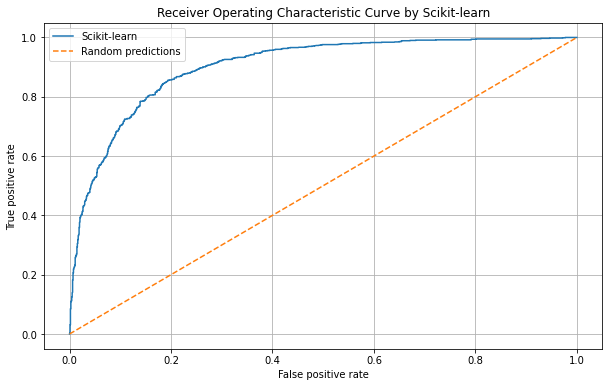

In [11]:
fpr_skl, tpr_skl, thres_skl = roc_curve(y_test, predictions[:,1])

plt.figure(figsize=(10,6))

plt.plot(fpr_skl, tpr_skl, label='Scikit-learn')
plt.plot([0,1],[0,1], '--', label='Random predictions')
plt.legend()
plt.grid()

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic Curve by Scikit-learn')
plt.show()

### 4. Вычислите значение ROC-AUC метрики с помощью функции sklearn.metrics.roc_auc_score

In [12]:
from sklearn.metrics import roc_auc_score

In [13]:
roc_auc_skl = roc_auc_score(y_test, predictions[:,1])
roc_auc_skl

0.9022564764252744

### 5. Реализуйте подсчет метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn

In [14]:
thresholds = np.linspace(0, 0.99, 100)

fpr_my, tpr_my, precision = [], [], []

for thres in thresholds:
    
    preds = np.where(predictions[:,1] >= thres, 1, 0)
    
    tp = np.equal(preds, 1) & np.equal(y_test, 1)
    fp = np.equal(preds, 1) & np.equal(y_test, 0)
    tn = np.equal(preds, 0) & np.equal(y_test, 0)
    fn = np.equal(preds, 0) & np.equal(y_test, 1)
    
    fpr_my.append(fp.sum() / (fp.sum() + tn.sum()))
    tpr_my.append(tp.sum() / (tp.sum() + fn.sum()))
    precision.append(tp.sum() / (tp.sum() + fp.sum()))

recall = tpr_my.copy()

### 6. Постройте ROC-кривую с помощью вычисленных в п. 5 метрик: объедините графики из п. 3 и п. 6 в один. Сравните, сделайте вывод

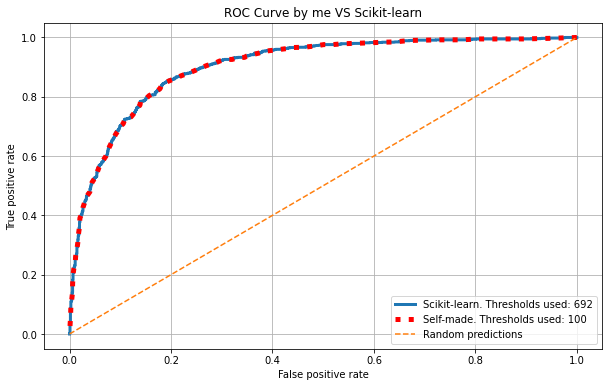

In [15]:
plt.figure(figsize=(10,6))

plt.plot(fpr_skl, tpr_skl, lw=3, label=f'Scikit-learn. Thresholds used: {len(thres_skl)}')
plt.plot(fpr_my, tpr_my, 'r:', lw=5, label=f'Self-made. Thresholds used: {len(thresholds)}')
plt.plot([0,1],[0,1], '--', label='Random predictions')
plt.legend()
plt.grid()

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve by me VS Scikit-learn')
plt.show()

### Вывод

ROC кривая, построенная с помощью вычисленных вручную метрик TPR и FPR практически идеально ложится на кривую, построенную с помощью функции `roc_curve` из `sklearn`. Это объясняется тем, что алгоритм построения кривой из `sklearn` использует те же формулы для рассчета метрик, что были использованы в ручном методе. Разница может быть в подходе к реализации, но фундаментально сами формулы расчета TPR и FPR не могут быть другими.

В ручном методе я использовал 100 значений для параметра `threshold` от 0 до 0.99, тогда как функция `roc_curve` 692 значения. Можно добиваться более идеального совпадения кривых, увеличивая количество пороговых значений в ручном методе, и приближая сами значения к тем, что использует функция из `sklearn`.

### 7. Постройте график Precision-Recall, используя метрики, посчитанные в п. 5

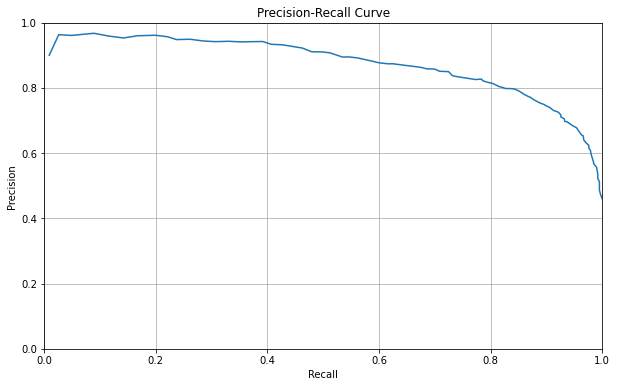

In [16]:
plt.figure(figsize=(10,6))

plt.plot(recall, precision)
plt.grid()
plt.ylim(0, 1)
plt.xlim(0, 1)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

### 8. Вычислите значение ROC-AUC метрики, используя метрики, посчитанные в п. 5

In [17]:
fpr_my = np.array(fpr_my)
tpr_my = np.array(tpr_my)

triangles_area = sum((fpr_my[:-1] - fpr_my[1:]) * (tpr_my[:-1] - tpr_my[1:])) / 2
rectangles_area = sum((fpr_my[:-2] - fpr_my[1:-1]) * tpr_my[1:-1])
roc_auc_my = triangles_area + rectangles_area

print('ROC-AUC score by Scikit-learn:', roc_auc_skl, '\n'
      'ROC-AUC score manually calculated:', roc_auc_my, '\n'
      'Difference between 2 methods:', '{:.16f}'.format(roc_auc_skl - roc_auc_my))

ROC-AUC score by Scikit-learn: 0.9022564764252744 
ROC-AUC score manually calculated: 0.9021809533318493 
Difference between 2 methods: 0.0000755230934251


### 9. Сформулируйте выводы по проделанной работе:

Была обучена модель логистической регрессии для бинарной классификации пола атлетов, а также произведена оценка качества полученной модели. В качестве целевого класса для расчета метрик были взяты атлеты женского пола.

- **Как по полученным графикам сделать вывод о качестве модели? Как вы оцениваете обученную модель исходя из подсчитанных метрик?**

В идеальном случае график ROC-кривой будет проходить через точку `[0, 1]`, а фигура под такой "кривой" окажется квадратом. Соответственно площадь квадрата под этой линией будет равна 1. В реальности чем ближе изгиб ROC-кривой на основе модели смещается в верхний левый угол в сторону точки `[0, 1]`, тем больше площадь фигуры под такой кривой, а значит выше предсказательная способность построенной модели и ее качество. Это легко наблюдать визуально, сравнивая кривые, построенные на основе разных моделей.

Похожим образом обстоит дело с Precision-Recall-кривой. В идеальном случае она будет прямой идущей от точки `[0, 1]` к точке `[1, 1]`. В реальности же модель тем лучше, чем ближе PR-кривая находится к верхней границе графика на всем своем протяжении.

Исходя из посчитанных метрик, а также оценив получившиеся графики ROC и PR кривых можно сказать, что построенная модель логистической регрессии весьма успешно справилась с задачей бинарной классификации пола атлетов. Полученное значение `ROC AUC = 0.90` близкое к 1 говорит о высоких предсказательных способностях модели.

- **Может ли ROC-кривая проходить ниже диагонали?**

Может, если классификатор ошибается слишком часто. Диагональная линия говорит о том, что классификатор присваивает классы случайным образом, то есть метрика точности его работы равна 0.5. Если же ROC-кривая проходит под диагональю, то соответственно его точность меньше 0.5, что может говорить о неправильной настройке классификатора. Ниже приведен пример, в котором я намеренно инвертировал вероятности, определенные классификатором и получил кривую, проходящую под диагональю.

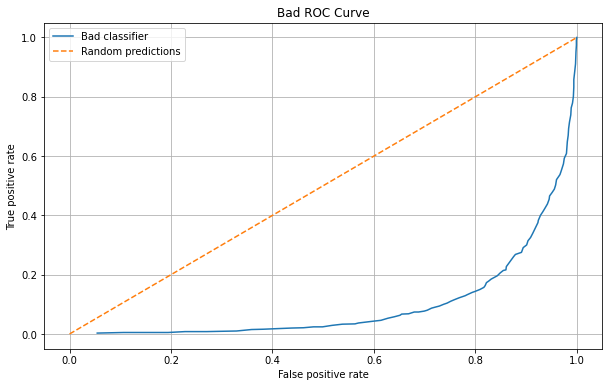

In [18]:
fpr_bad, tpr_bad = [], []

for thres in thresholds:
    
    preds = np.where((1 - predictions[:,1]) > thres, 1, 0)
    
    tp = np.equal(preds, 1) & np.equal(y_test, 1)
    fp = np.equal(preds, 1) & np.equal(y_test, 0)
    tn = np.equal(preds, 0) & np.equal(y_test, 0)
    fn = np.equal(preds, 0) & np.equal(y_test, 1)
    
    fpr_bad.append(fp.sum() / (fp.sum() + tn.sum()))
    tpr_bad.append(tp.sum() / (tp.sum() + fn.sum()))

plt.figure(figsize=(10,6))

plt.plot(fpr_bad, tpr_bad, label='Bad classifier')
plt.plot([0,1],[0,1], '--', label='Random predictions')
plt.legend()
plt.grid()

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Bad ROC Curve')
plt.show()